General Idea:


1.   Data Processing
*   Impute missing data using built in simple imputer  OR KNNImputer
2.   Model
*   K-Means clustering on the labeled training data (ignore labeled data).
*   Then use the model to predict labels of the non-labeled training data.





In [1]:
import numpy as np
import pandas as pd
# from sklearn.impute import SimpleImputer
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

In [2]:
"""UNCOMMENT THIS BLOCK IF USING GOOGLE COLAB"""
# from google.colab import files

# uploaded = files.upload()

'UNCOMMENT THIS BLOCK IF USING GOOGLE COLAB'

### DATA PROCESSING

In [3]:
#url = 'https://raw.githubusercontent.com/robster165/MLGroup38/refs/heads/main/train.csv?token=GHSAT0AAAAAACYMHD2FMOF5WYQUPAX72PPYZZJP5MA'
# upload the train.csv file for now
dftrain = pd.read_csv('train.csv')
dftrain.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dftest = pd.read_csv('test.csv')
dftest.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dropped_cols = ['id', 'Basic_Demos-Enroll_Season', 'SDS-Season', 'PreInt_EduHx-Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PCIAT-Season', 'PAQ_A-Season', 'PAQ_C-Season']
dropped_cols.extend(['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20'])

In [6]:
#remove any column with a NaN rate > 45% and unnecessary columns
col_processed_dftrain = dftrain.drop(columns=dropped_cols)
col_processed_dftrain = col_processed_dftrain.loc[:, dftrain.isna().mean() * 100 < 45]
col_processed_dftrain = col_processed_dftrain.dropna(thresh=col_processed_dftrain.shape[1] - 10)



Impute features on labeled training dataset

In [7]:
training_labeled = col_processed_dftrain[col_processed_dftrain['sii'].notna()]
training_labeled_X = training_labeled.drop(columns='sii')
training_labeled_Y = training_labeled['sii']

train_unlabeled = col_processed_dftrain[col_processed_dftrain['sii'].isna()]
train_unlabeled_features = train_unlabeled.drop(columns='sii')

In [8]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_training_labeled_X = pd.DataFrame(imputer.fit_transform(training_labeled_X), columns=training_labeled_X.columns)
imputed_training_unlabeled_X = pd.DataFrame(imputer.transform(train_unlabeled_features), columns=train_unlabeled_features.columns)

In [9]:
#Do SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_imputed_training_labeled_smote, y_imputed_training_labeled_smote = smote.fit_resample(imputed_training_labeled_X, training_labeled_Y)

### PSUEDO LABELING

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#May use SMOTE here because of imbalanced data
rf = RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=2)
rf.fit(X_imputed_training_labeled_smote, y_imputed_training_labeled_smote)
RF_predict_unlabeled_Y = rf.predict(imputed_training_unlabeled_X)

print(classification_report(y_imputed_training_labeled_smote, rf.predict(X_imputed_training_labeled_smote)))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      1425
         1.0       0.92      0.69      0.79      1425
         2.0       0.87      0.70      0.78      1425
         3.0       0.77      0.98      0.86      1425

    accuracy                           0.83      5700
   macro avg       0.84      0.83      0.83      5700
weighted avg       0.84      0.83      0.83      5700



In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_imputed_training_labeled_smote, y_imputed_training_labeled_smote)
KNN_predict_unlabeled_Y = knn.predict(imputed_training_unlabeled_X)

print(classification_report(y_imputed_training_labeled_smote, knn.predict(X_imputed_training_labeled_smote)))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1425
         1.0       0.85      0.95      0.90      1425
         2.0       0.96      0.94      0.95      1425
         3.0       0.97      1.00      0.98      1425

    accuracy                           0.94      5700
   macro avg       0.94      0.94      0.94      5700
weighted avg       0.94      0.94      0.94      5700



**Combine Labels and Features**

In [12]:
RF_combined_labels = np.concatenate((training_labeled_Y, RF_predict_unlabeled_Y))
KNN_combined_labels = np.concatenate((training_labeled_Y, KNN_predict_unlabeled_Y))
combined_features = pd.concat([imputed_training_labeled_X, imputed_training_unlabeled_X], ignore_index=True)

### MODEL TRAINING - RF and KNN

In [13]:

from sklearn.model_selection import train_test_split

In [14]:
# Split the combined dataset into training and testing sets (80% train, 20% test)
KNN_X_train, KNN_X_test, KNN_y_train, KNN_y_test = train_test_split(
    combined_features,
    KNN_combined_labels,
    test_size=0.2,
    random_state=42,  # For reproducibility
    stratify=KNN_combined_labels  # Ensures proportional representation of classes
)

# Initialize SMOTE with a fixed random state for reproducibility
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data and resample
KNN_X_train_resampled, KNN_y_train_resampled = smote.fit_resample(KNN_X_train, KNN_y_train)

print(f"Original training set size: {KNN_X_train.shape[0]}")
print(f"Resampled training set size: {KNN_X_train_resampled.shape[0]}")

# Initialize KNN classifier
num_neighbors = (np.sqrt(KNN_X_train_resampled.shape[0])/4).astype(int)
knn_classifier = KNeighborsClassifier(n_neighbors=20)

# Train KNN on resampled training data
knn_classifier.fit(KNN_X_train_resampled, KNN_y_train_resampled)

# Predict on the test set
KNN_predict_test_labels = knn_classifier.predict(KNN_X_test)

# Print classification report for KNN
print("KNN Classification Report on Test Data:")
print(classification_report(KNN_y_test, KNN_predict_test_labels))

KNN_predict_labeled_Y = knn_classifier.predict(imputed_training_labeled_X)
print("KNN Classification Report on KNN Labeled Training Data:")
print(classification_report(training_labeled_Y, KNN_predict_labeled_Y))


Original training set size: 2257
Resampled training set size: 5344
KNN Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91       335
         1.0       0.69      0.85      0.76       155
         2.0       0.72      0.83      0.77        69
         3.0       0.38      0.83      0.53         6

    accuracy                           0.84       565
   macro avg       0.70      0.84      0.74       565
weighted avg       0.87      0.84      0.85       565

KNN Classification Report on KNN Labeled Training Data:
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      1425
         1.0       0.69      0.91      0.79       648
         2.0       0.85      0.88      0.86       334
         3.0       0.56      0.97      0.71        30

    accuracy                           0.86      2437
   macro avg       0.77      0.90      0.82      2437
weighted avg       0.8

In [15]:
# Split the combined dataset into training and testing sets (80% train, 20% test)
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(
    combined_features,
    RF_combined_labels,
    test_size=0.2,
    random_state=42,  # For reproducibility
    stratify=RF_combined_labels,  # Ensures proportional representation of classes
)

# Initialize SMOTE with a fixed random state for reproducibility
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data and resample
rf_X_train_resampled, rf_y_train_resampled = smote.fit_resample(rf_X_train, rf_y_train)

print(f"Original training set size: {rf_X_train.shape[0]}")
print(f"Resampled training set size: {rf_X_train_resampled.shape[0]}")

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=2)

# Train RF on the resampled training data
rf_classifier.fit(rf_X_train_resampled, rf_y_train_resampled)

# Predict on the test set using RF
RF_predict_test_labels = rf_classifier.predict(rf_X_test)

# Print classification report for RF
print("RF Classification Report on Test Data:")
print(classification_report(rf_y_test, RF_predict_test_labels))

RF_predict_labeled_Y = rf_classifier.predict(imputed_training_labeled_X)
print("RF Classification Report on RF Labeled Training Data:")
print(classification_report(training_labeled_Y, RF_predict_labeled_Y))

Original training set size: 2257
Resampled training set size: 5488
RF Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       343
         1.0       0.79      0.71      0.75       141
         2.0       0.64      0.36      0.46        69
         3.0       0.17      0.83      0.28        12

    accuracy                           0.82       565
   macro avg       0.64      0.72      0.61       565
weighted avg       0.87      0.82      0.83       565

RF Classification Report on RF Labeled Training Data:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1425
         1.0       0.81      0.72      0.76       648
         2.0       0.71      0.44      0.54       334
         3.0       0.10      0.70      0.17        30

    accuracy                           0.82      2437
   macro avg       0.64      0.70      0.61      2437
weighted avg       0.87  

In [16]:
rf_to_knn_X_train, rf_to_knn_X_test, rf_to_knn_y_train, rf_to_knn_y_test = train_test_split( rf_X_train_resampled, rf_y_train_resampled, test_size=0.2, random_state=42, stratify=rf_y_train_resampled)

smote = SMOTE(random_state=42)

# Fit SMOTE on the training data and resample
rf_to_knn_X_train_resampled, rf_to_knn_y_train_resampled = smote.fit_resample(rf_to_knn_X_train, rf_to_knn_y_train)

print(f"Original training set size: {rf_to_knn_X_train.shape[0]}")
print(f"Resampled training set size: {rf_to_knn_X_train_resampled.shape[0]}")

# Initialize KNN classifier
num_neighbors = (np.sqrt(rf_to_knn_X_train_resampled.shape[0])/4).astype(int)
rf_to_knn_classifier = KNeighborsClassifier(n_neighbors=20)

# Train KNN on resampled training data
rf_to_knn_classifier.fit(rf_to_knn_X_train_resampled, rf_to_knn_y_train_resampled)

# Predict on the test set
rf_to_knn_predict_test_labels = rf_to_knn_classifier.predict(rf_to_knn_X_test)

# Print classification report for KNN
print("KNN Classification Report on Test Data:")
print(classification_report(rf_to_knn_y_test, rf_to_knn_predict_test_labels))

rf_to_knn_predict_labeled_Y = rf_to_knn_classifier.predict(imputed_training_labeled_X)
print("KNN Classification Report on RF Labeled Training Data:")
print(classification_report(training_labeled_Y, rf_to_knn_predict_labeled_Y))

Original training set size: 4390
Resampled training set size: 4392
KNN Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.89       275
         1.0       0.84      0.90      0.87       274
         2.0       0.96      0.90      0.93       275
         3.0       0.87      1.00      0.93       274

    accuracy                           0.90      1098
   macro avg       0.91      0.90      0.90      1098
weighted avg       0.91      0.90      0.90      1098

KNN Classification Report on RF Labeled Training Data:
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      1425
         1.0       0.70      0.83      0.76       648
         2.0       0.86      0.82      0.84       334
         3.0       0.17      0.97      0.28        30

    accuracy                           0.82      2437
   macro avg       0.68      0.86      0.70      2437
weighted avg       0.89

In [17]:
knn_to_rf_X_train, knn_to_rf_X_test, knn_to_rf_y_train, knn_to_rf_y_test = train_test_split( KNN_X_train_resampled, KNN_y_train_resampled, test_size=0.2, random_state=42, stratify=KNN_y_train_resampled)

smote = SMOTE(random_state=42)

# Fit SMOTE on the training data and resample
knn_to_rf_X_train_resampled, knn_to_rf_y_train_resampled = smote.fit_resample(knn_to_rf_X_train, knn_to_rf_y_train)

print(f"Original training set size: {knn_to_rf_X_train.shape[0]}")
print(f"Resampled training set size: {knn_to_rf_X_train_resampled.shape[0]}")

knn_to_rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=2)

# Train RF on the resampled training data
knn_to_rf_classifier.fit(knn_to_rf_X_train_resampled, knn_to_rf_y_train_resampled)

# Predict on the test set using RF
knn_to_rf_predict_test_labels = knn_to_rf_classifier.predict(knn_to_rf_X_test)

# Print classification report for RF
print("RF Classification Report on Test Data:")
print(classification_report(knn_to_rf_y_test, knn_to_rf_predict_test_labels))

knn_to_rf_predict_labeled_Y = knn_to_rf_classifier.predict(imputed_training_labeled_X)
print("RF Classification Report on KNN Labeled Training Data:")
print(classification_report(training_labeled_Y, knn_to_rf_predict_labeled_Y))

Original training set size: 4275
Resampled training set size: 4276
RF Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       267
         1.0       0.97      0.79      0.87       267
         2.0       0.93      0.76      0.84       268
         3.0       0.75      0.94      0.84       267

    accuracy                           0.86      1069
   macro avg       0.88      0.86      0.86      1069
weighted avg       0.88      0.86      0.86      1069

RF Classification Report on KNN Labeled Training Data:
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1425
         1.0       0.98      0.72      0.83       648
         2.0       0.98      0.75      0.85       334
         3.0       0.14      0.83      0.25        30

    accuracy                           0.87      2437
   macro avg       0.75      0.82      0.71      2437
weighted avg       0.92 

In [18]:
print("KNN Classification Report on KNN Labeled Training Data:")
print(classification_report(training_labeled_Y, KNN_predict_labeled_Y))

print("RF Classification Report on RF Labeled Training Data:")
print(classification_report(training_labeled_Y, RF_predict_labeled_Y))

print("KNN Classification Report on RF Labeled Training Data:")
print(classification_report(training_labeled_Y, rf_to_knn_predict_labeled_Y))

print("RF Classification Report on KNN Labeled Training Data:")
print(classification_report(training_labeled_Y, knn_to_rf_predict_labeled_Y))

KNN Classification Report on KNN Labeled Training Data:
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      1425
         1.0       0.69      0.91      0.79       648
         2.0       0.85      0.88      0.86       334
         3.0       0.56      0.97      0.71        30

    accuracy                           0.86      2437
   macro avg       0.77      0.90      0.82      2437
weighted avg       0.89      0.86      0.86      2437

RF Classification Report on RF Labeled Training Data:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1425
         1.0       0.81      0.72      0.76       648
         2.0       0.71      0.44      0.54       334
         3.0       0.10      0.70      0.17        30

    accuracy                           0.82      2437
   macro avg       0.64      0.70      0.61      2437
weighted avg       0.87      0.82      0.84      2437

KNN Classification R

### VISUALIZATION

[0. 1. 2. 3.]


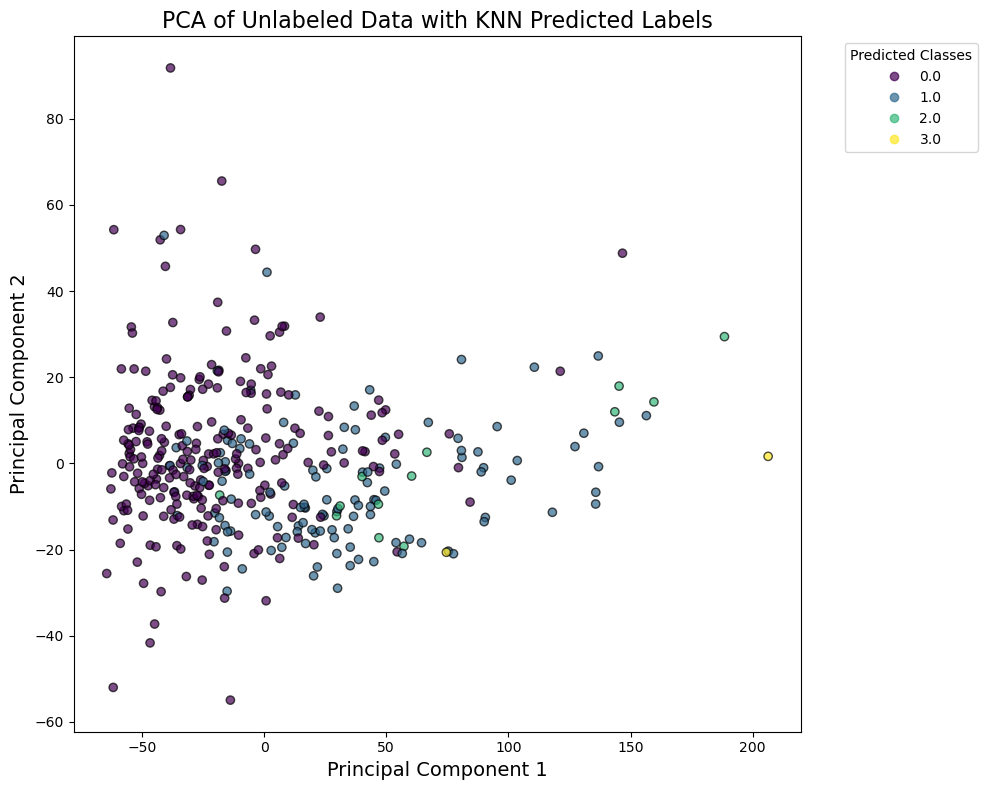

[0. 1. 2. 3.]


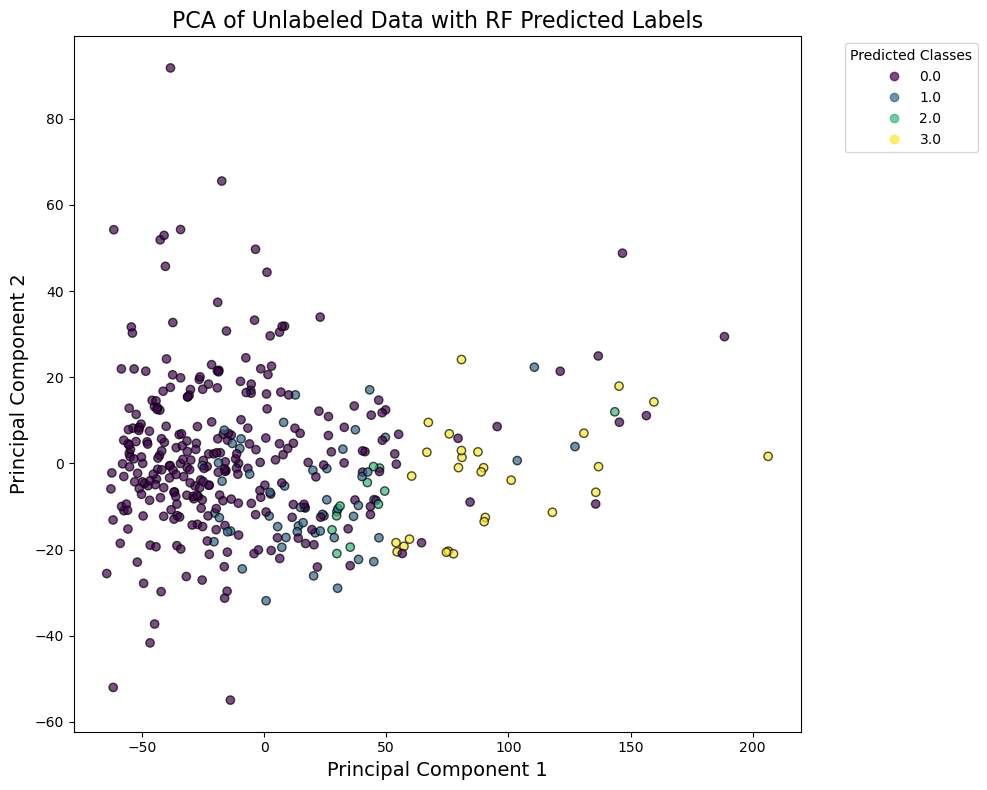

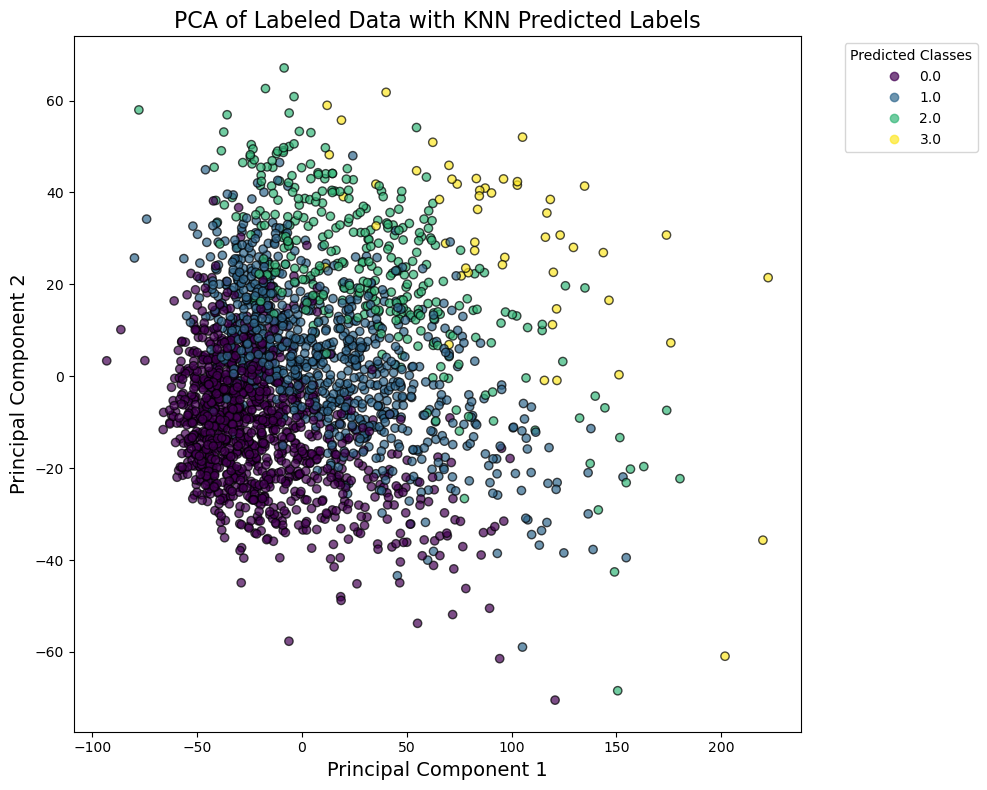

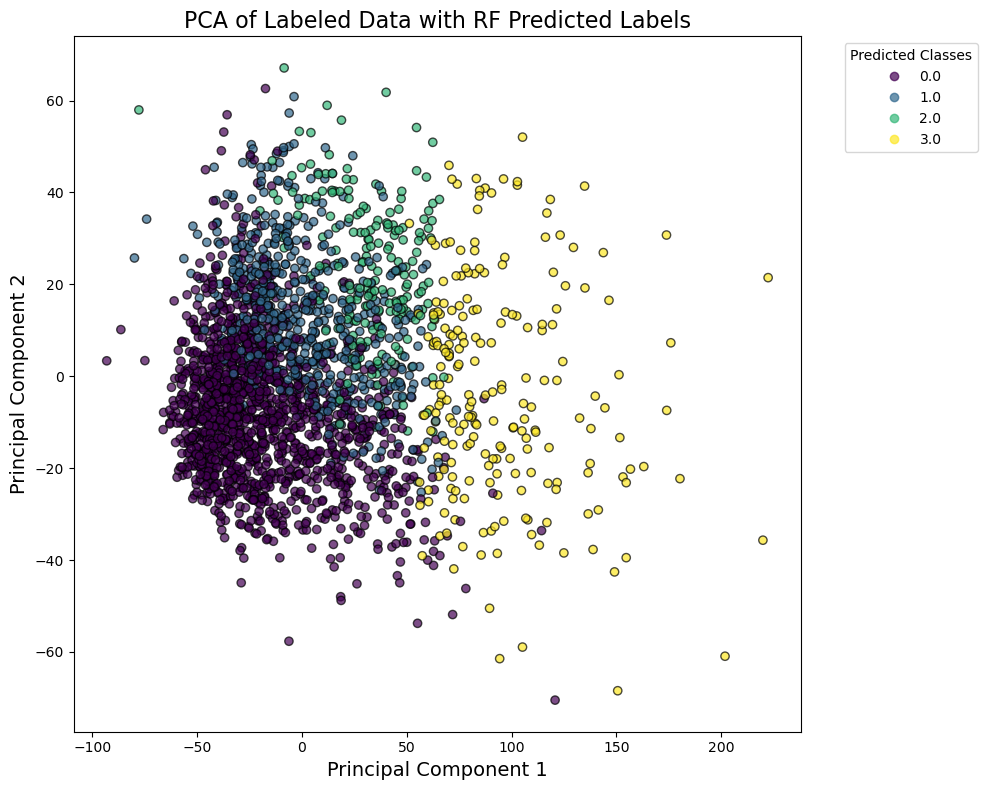

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the PCA plotting function
def plot_pca(X, y, title, legend_title='Classes', cmap='viridis'):
    """
    Performs PCA on the given data and plots the first two principal components.

    Parameters:
    - X: Feature matrix (numpy array or pandas DataFrame).
    - y: Labels corresponding to X.
    - title: Title of the plot.
    - legend_title: Title for the legend.
    - cmap: Colormap for the scatter plot.
    """
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        X_pca[:, 0], X_pca[:, 1],
        c=y, cmap=cmap, alpha=0.7, edgecolors='k'
    )

    unique_labels = np.unique(y)
    handles, _ = scatter.legend_elements()

    plt.legend(handles, unique_labels, title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.title(title, fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)

    plt.tight_layout()
    plt.show()

print(np.unique(KNN_predict_unlabeled_Y))
# Plot PCA of the KNN unlabled data with the RF predicted labels
plot_pca(
    X=imputed_training_unlabeled_X,
    y=KNN_predict_unlabeled_Y,
    title='PCA of Unlabeled Data with KNN Predicted Labels',
    legend_title='Predicted Classes'
)

print(np.unique(RF_predict_unlabeled_Y))
# Plot PCA of the RF unlabled data with the RF predicted labels
plot_pca(
    X=imputed_training_unlabeled_X,
    y=RF_predict_unlabeled_Y,
    title='PCA of Unlabeled Data with RF Predicted Labels',
    legend_title='Predicted Classes'
)

# Plot PCA of the labeled data with the KNN predicted labels
plot_pca(
    X=imputed_training_labeled_X,
    y=KNN_predict_labeled_Y,
    title='PCA of Labeled Data with KNN Predicted Labels',
    legend_title='Predicted Classes'
)

# Plot PCA of the labeled data with the RF predicted labels
plot_pca(
    X=imputed_training_labeled_X,
    y=RF_predict_labeled_Y,
    title='PCA of Labeled Data with RF Predicted Labels',
    legend_title='Predicted Classes'
)






## GMM

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE to the labeled training data
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(imputed_training_labeled_X, training_labeled_Y)

# Define the range of components to test
n_components_range = range(1, 60)
covariance_type = 'full'

lowest_bic = np.infty
bic_scores = []
n_components_best = None
best_gmm = None

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
    gmm.fit(X_balanced)
    bic = gmm.bic(X_balanced)
    bic_scores.append(bic)
    if bic < lowest_bic:
        lowest_bic = bic
        best_gmm = gmm
        n_components_best = n_components

print(f"Best number of components by BIC: {n_components_best}")

# Plot the BIC scores against the number of components
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC Scores per Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [21]:
# Fit GMM to the data with the best number of components
gmm = GaussianMixture(n_components=48, covariance_type=covariance_type, random_state=42)
gmm.fit(X_balanced)

# Predict cluster labels
gmm_labels = gmm.predict(X_balanced)

# Create a DataFrame to hold cluster assignments and actual labels
cluster_label_df = pd.DataFrame({'gmm_cluster': gmm_labels, 'sii_label': y_balanced})

# Map clusters to the most frequent 'sii' label using pandas' mode()
cluster_to_sii = cluster_label_df.groupby('gmm_cluster')['sii_label'].agg(lambda x: x.mode().iloc[0])

# Replace cluster labels with mapped 'sii' labels
predicted_sii_labels = np.copy(gmm_labels)
for cluster in cluster_to_sii.index:
    predicted_sii_labels[gmm_labels == cluster] = cluster_to_sii[cluster]

# Evaluate the model y
print("Classification Report:")
print(classification_report(y_balanced, predicted_sii_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_balanced, predicted_sii_labels))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.83      0.68      1425
         1.0       0.56      0.51      0.53      1425
         2.0       0.88      0.54      0.67      1425
         3.0       0.94      0.98      0.96      1425

    accuracy                           0.72      5700
   macro avg       0.74      0.72      0.71      5700
weighted avg       0.74      0.72      0.71      5700

Confusion Matrix:
[[1189  234    2    0]
 [ 628  725   70    2]
 [ 236  333  773   83]
 [   0    0   31 1394]]


In [22]:
# Predict on original (unbalanced) data
gmm_labels_original = gmm.predict(imputed_training_labeled_X)

# Map clusters to 'sii' labels using the mapping from balanced data
predicted_sii_labels_original = np.copy(gmm_labels_original)
for cluster in cluster_to_sii.index:
    predicted_sii_labels_original[gmm_labels_original == cluster] = cluster_to_sii[cluster]

# Evaluate the model on original data
print("Classification Report (Original Data with GMM Trained on Balanced Data):")
print(classification_report(training_labeled_Y, predicted_sii_labels_original))

print("Confusion Matrix (Original Data with GMM Trained on Balanced Data):")
print(confusion_matrix(training_labeled_Y, predicted_sii_labels_original))


Classification Report (Original Data with GMM Trained on Balanced Data):
              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77      1425
         1.0       0.45      0.36      0.40       648
         2.0       0.84      0.47      0.61       334
         3.0       0.52      1.00      0.68        30

    accuracy                           0.66      2437
   macro avg       0.63      0.67      0.61      2437
weighted avg       0.66      0.66      0.65      2437

Confusion Matrix (Original Data with GMM Trained on Balanced Data):
[[1189  234    2    0]
 [ 383  236   27    2]
 [  90   60  158   26]
 [   0    0    0   30]]


## VISUALIZATION

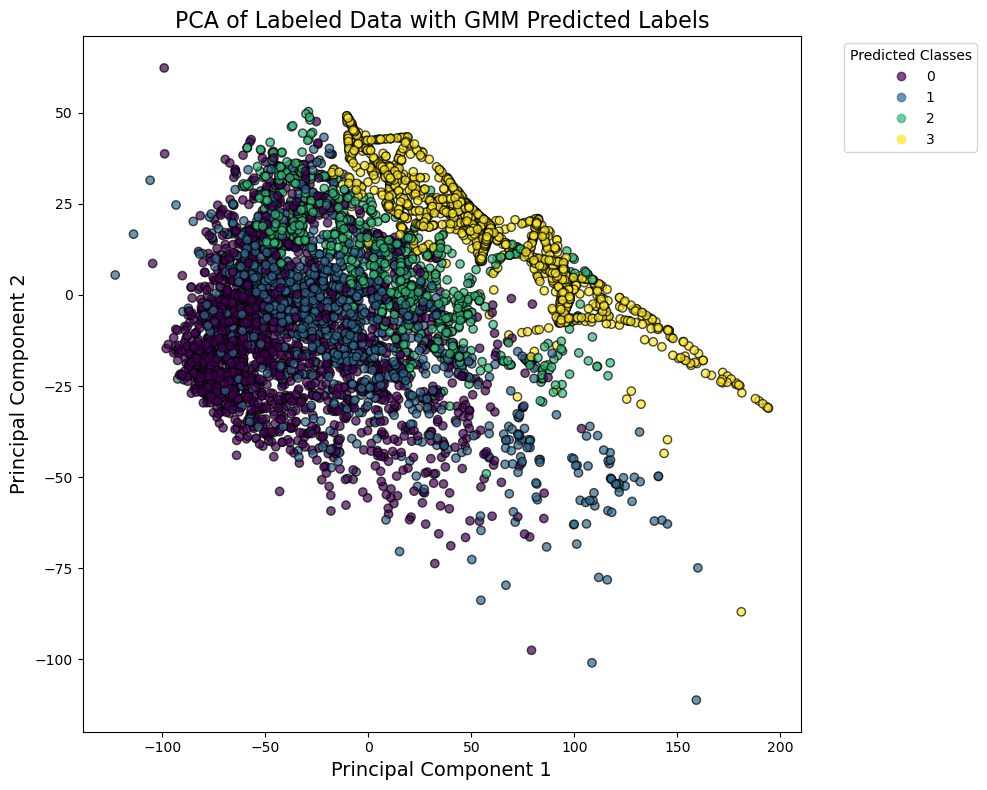

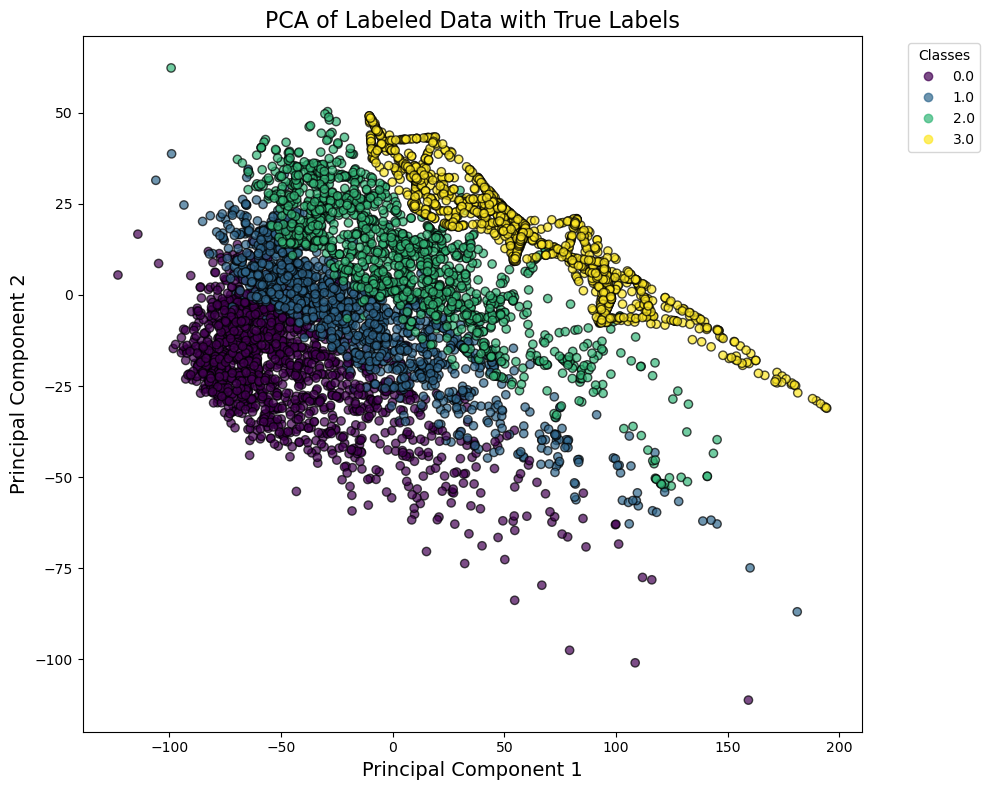

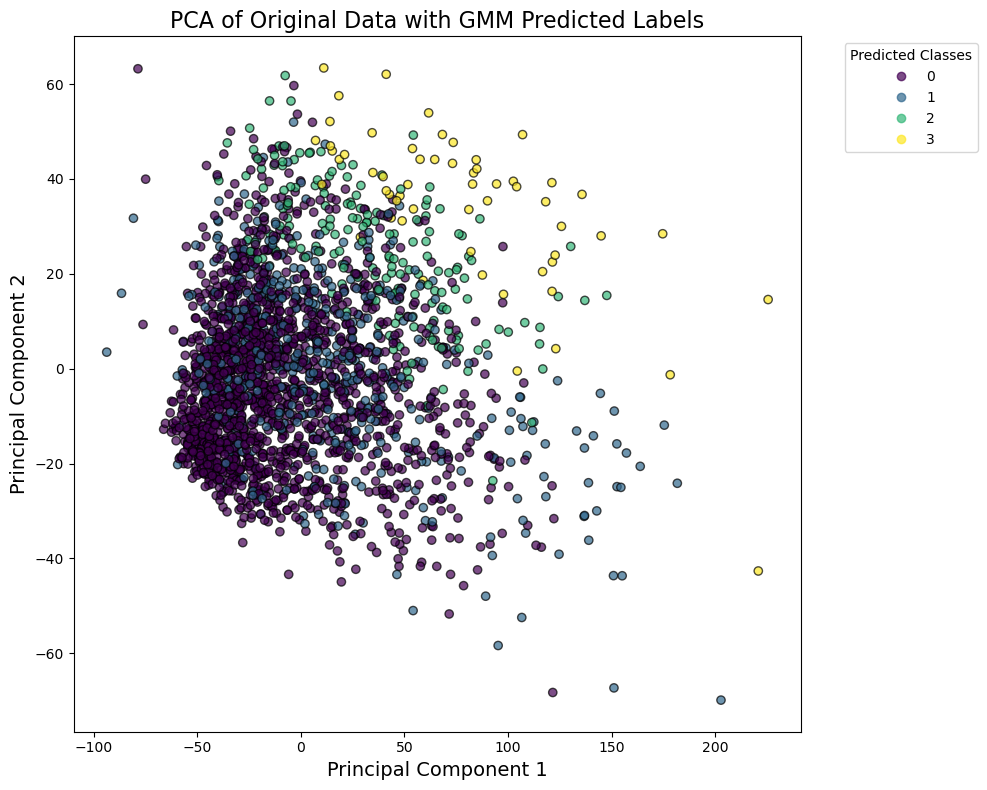

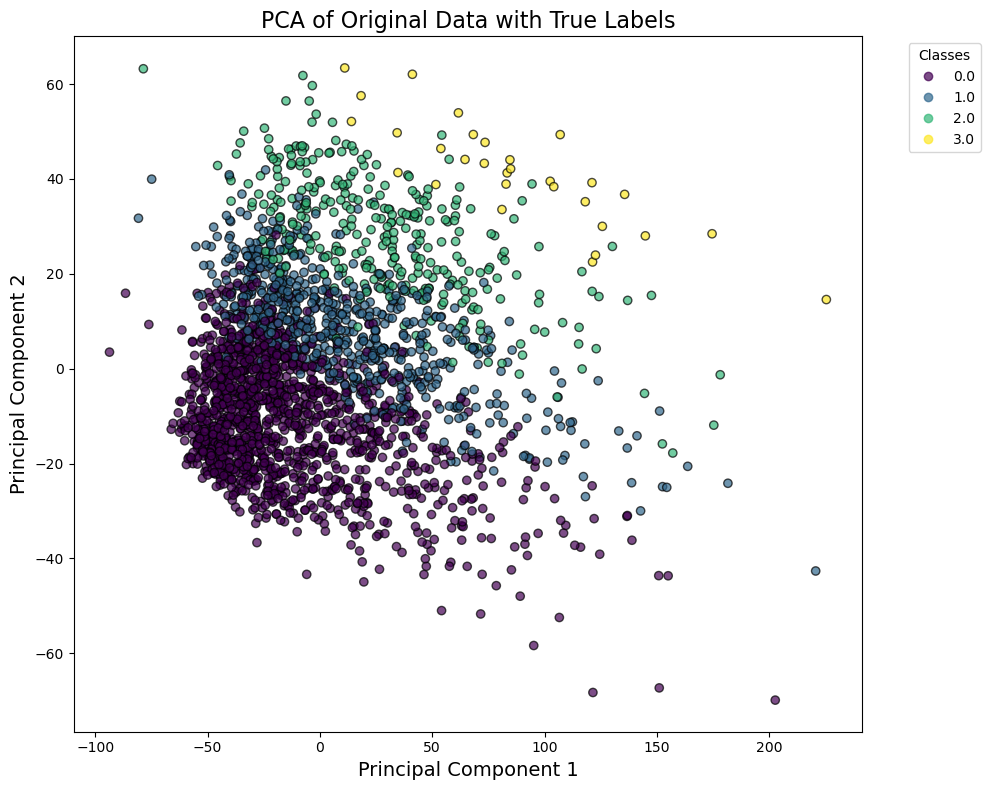

"\n# Visualize the true `sii` labels on the original data\nplt.figure(figsize=(8, 6))\nscatter = plt.scatter(\n    X_original_pca_2d[:, 0],\n    X_original_pca_2d[:, 1],\n    c=training_labeled_Y,\n    cmap='viridis',\n    alpha=0.7,\n    edgecolors='k'\n)\nplt.title('Original Data Colored by True `sii` Labels', fontsize=14)\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\ncbar = plt.colorbar(scatter, ticks=np.unique(training_labeled_Y))\ncbar.set_label('True `sii` Label')\nplt.tight_layout()\nplt.show()\n"

In [ ]:
# Visualize the clusters in 2D using PCA
pca_visualization = PCA(n_components=2, random_state=42)
X_balanced_pca_2d = pca_visualization.fit_transform(X_balanced)

# Plot the clusters with mapped 'sii' labels

plot_pca(
    X=X_balanced_pca_2d,
    y=predicted_sii_labels,
    title='PCA of Pseudolabeled Data with GMM Predicted Labels',
    legend_title='Predicted Classes'
)
"""
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_balanced_pca_2d[:, 0],
    X_balanced_pca_2d[:, 1],
    c=predicted_sii_labels,
    cmap='viridis',
    alpha=0.7,
    edgecolors='k'
)
plt.title('GMM Clusters Mapped to `sii` Labels (Balanced Data)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(scatter, ticks=np.unique(predicted_sii_labels))
cbar.set_label('Mapped `sii` Label')
plt.tight_layout()
plt.show()
"""

plot_pca(
    X=X_balanced_pca_2d,
    y=y_balanced,
    title='PCA of Pseudolabeled Data with True Labels',
    legend_title='Classes'
)
"""
# Visualize the true `sii` labels on the balanced data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_balanced_pca_2d[:, 0],
    X_balanced_pca_2d[:, 1],
    c=y_balanced,
    cmap='viridis',
    alpha=0.7,
    edgecolors='k'
)
plt.title('Balanced Data Colored by True `sii` Labels', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(scatter, ticks=np.unique(y_balanced))
cbar.set_label('True `sii` Label')
plt.tight_layout()
plt.show()
"""

# Visualize the clusters on the original (unbalanced) data
# Reduce dimensionality of the original data
X_original_pca_2d = pca_visualization.transform(imputed_training_labeled_X)

# Predict labels for the original data using the trained GMM
gmm_labels_original = gmm.predict(imputed_training_labeled_X)

# Map clusters to 'sii' labels using the mapping from balanced data
predicted_sii_labels_original = np.copy(gmm_labels_original)
for cluster in cluster_to_sii.index:
    predicted_sii_labels_original[gmm_labels_original == cluster] = cluster_to_sii[cluster]

plot_pca(
    X=X_original_pca_2d,
    y=predicted_sii_labels_original,
    title='PCA of Labeled Data with GMM Predicted Labels',
    legend_title='Predicted Classes'
)
"""
# Plot the clusters with mapped 'sii' labels on the original data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_original_pca_2d[:, 0],
    X_original_pca_2d[:, 1],
    c=predicted_sii_labels_original,
    cmap='viridis',
    alpha=0.7,
    edgecolors='k'
)
plt.title('GMM Clusters Mapped to `sii` Labels (Original Data)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(scatter, ticks=np.unique(predicted_sii_labels_original))
cbar.set_label('Mapped `sii` Label')
plt.tight_layout()
plt.show()
"""
plot_pca(
    X=X_original_pca_2d,
    y=training_labeled_Y,
    title='PCA of Labeled Data with True Labels',
    legend_title='Classes'
)
"""
# Visualize the true `sii` labels on the original data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_original_pca_2d[:, 0],
    X_original_pca_2d[:, 1],
    c=training_labeled_Y,
    cmap='viridis',
    alpha=0.7,
    edgecolors='k'
)
plt.title('Original Data Colored by True `sii` Labels', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(scatter, ticks=np.unique(training_labeled_Y))
cbar.set_label('True `sii` Label')
plt.tight_layout()
plt.show()
"""
